ANA Group

Group members:
Haocong Cheng,
Minghao Guo,
Qiuyan Guo,
Yuerong Hu

The dataset is got from Haocong’s own flight history which contains 194 rows * 40 cols. It represents for all types of information of his flights, including date, flight numbers, countries and cities, airport information, duration of flights, mileages, prices, manufacture information… etc; the columns are the attributes in the dataset, and the rows are the tuples, and each row represents a single, implicitly structured data item in a table, while a column is a set of data values of a particular simple type, one value for each row of the database. Some of the data are nominal values (such as Airline, country, city, airport, manufacture… etc.), and some of the others are numerical values (such as price, tax, meal, bag… etc.), and some of the others are the combination of numerical and nominal values. We can visualize not only the information of each variable, but also a lot of relationships between different pairs of variables, and because of its authenticity, it will be very interesting to look into the dataset, and also it will be quite useful for Haocong’s later research on this dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy

In [2]:
%matplotlib inline

In [3]:
Flights = pd.read_excel('flights.xlsx')
df = pd.read_excel('flights.xlsx')
dt = pd.read_excel('flights.xlsx')

In [4]:
Flights.dtypes

Date                  object
Flight No             object
Actual                object
Airline               object
Domestic/Int          object
Alliance              object
Country/Region        object
Departure City        object
Departure Airport     object
Depart Code           object
Depart Terminal       object
Arrival City          object
Arrival Airport       object
Arrive Code           object
Arrive Terminal       object
Gate                  object
Depart Shuttle        object
Arrive Shuttle        object
Dep Time              object
Dep Timezone          object
Arr Time              object
Arr Timezone          object
Date Change           object
Duration              object
Dep Delay            float64
Arr Delay            float64
Mileage                int64
Service Class         object
Ticketing Class       object
Seat                  object
Price                 object
Tax                  float64
Manufacturer          object
Aircraft              object
Aircraft Code 

This part is used to visualize the airlines flown. Since the airline part has very detailed information for regional carriers (like Republic Airways for United Express), it will separate into both "actual carrier" and "ticketing carrier".

In [5]:
Flights["Airline"].unique()

array(['China Eastern Airlines', 'Spring Airlines', 'Shandong Airlines',
       'Juneyao Airlines', 'Dragonair', 'Cathay Pacific Airways',
       'Emirates Airlines', 'Air China', 'Shanghai Airlines',
       'American Airlines', 'AirTran Airways', 'Delta Air Lines',
       'United Airlines', 'Japan Airlines', 'China Southern Airlines',
       'Singapore Airlines', 'Shenzhen Airlines',
       'Republic Airways\ndba US Airways Express', 'US Airways',
       'Shuttle America Airlines\ndba United Express',
       'Republic Airways\ndba United Express',
       'ExpressJet Airlines\ndba United Express', 'Alaska Airlines',
       'Asiana Airlines', 'Vietnam Airlines', 'VietJet Air',
       'Virgin America Airlines', 'Mesa Airlines\ndba United Express',
       'Horizon Air\ndba Alaska Horizon', 'All Nippon Airways',
       'Hainan Airlines', 'Air Busan', 'Dalian Airlines\ndba Air China',
       'Star Flyer', 'Xiamen Airlines',
       'Air Georgian\ndba Air Canada Express', 'Air Canada',
      

In [6]:
Flights['Airline_actual'] = Flights['Airline']

In [7]:
Flights['Airline_sold'] = Flights['Airline']

In [8]:
def replace_airline(old_airline):
    if old_airline == 'United Express':
        return 'United Airlines'
    elif old_airline == 'Delta Connection':
        return 'Delta Air Lines'
    elif old_airline == 'American Eagle':
        return "American Airlines"
    elif old_airline == 'Alaska Horizon':
        return 'Alaska Airlines'
    elif old_airline == 'Air Canada Express':
        return 'Air Canada'
    elif old_airline == 'US Airways Express':
        return 'US Airways'
    else:
        return old_airline

In [9]:
for i, row in Flights.iterrows():
    temp = row['Airline'].split('\ndba ')
    Flights.set_value(i, 'Airline_actual', temp[0])
    if  len(temp) == 2:       
        Flights.set_value(i, 'Airline_sold', replace_airline(temp[1]))

/home/shared/sp18-is590dv/conda_envs/is590dv-default/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/home/shared/sp18-is590dv/conda_envs/is590dv-default/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [10]:
Flights["Airline_actual"]

0      China Eastern Airlines
1             Spring Airlines
2             Spring Airlines
3      China Eastern Airlines
4      China Eastern Airlines
5             Spring Airlines
6             Spring Airlines
7           Shandong Airlines
8           Shandong Airlines
9             Spring Airlines
10            Spring Airlines
11           Juneyao Airlines
12                  Dragonair
13                  Dragonair
14     China Eastern Airlines
15     Cathay Pacific Airways
16                  Dragonair
17          Emirates Airlines
18          Emirates Airlines
19          Emirates Airlines
20          Emirates Airlines
21            Spring Airlines
22     China Eastern Airlines
23           Juneyao Airlines
24     China Eastern Airlines
25                  Air China
26                  Air China
27          Shanghai Airlines
28            Spring Airlines
29          American Airlines
                ...          
167           United Airlines
168     Trans States Airlines
169       

In [11]:
Airline_sold = Flights.groupby('Airline_sold')['Flight No'].count().sort_values(ascending = False)

In [12]:
Airline_actual = Flights.groupby('Airline_actual')['Flight No'].count().sort_values(ascending = False)

A simple dotplot for airlinnes sold. However, it is not easy to easily see the airlines and compare the count.

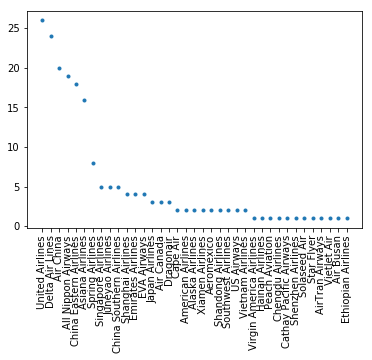

In [13]:
plt.plot(Airline_sold, '.')
plt.xticks(rotation=90)
plt.show()

A better way is to use a barplot (not histogram). With horizontal bars and appropriate size of the graph it is easier to see the difference between different airlines. This one is for "Airlines sold"

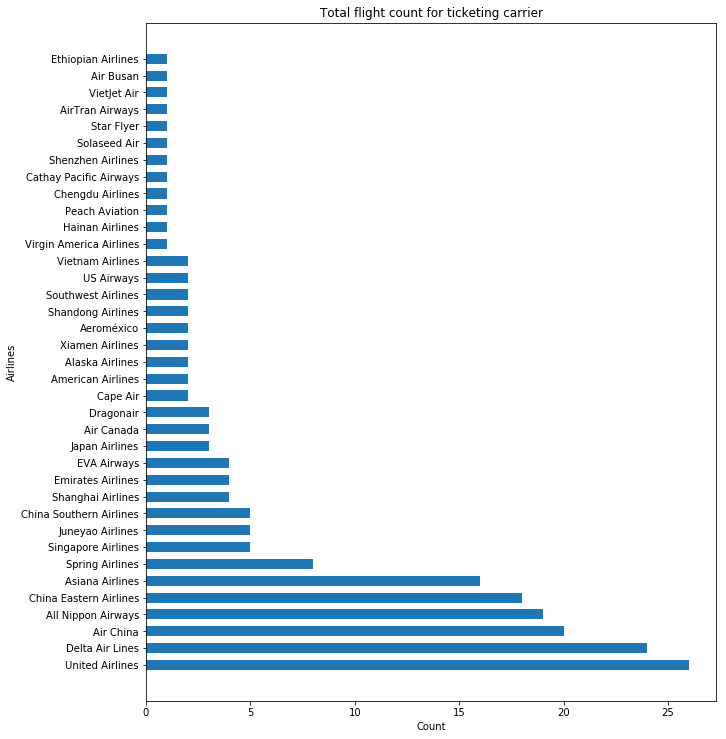

In [14]:
plt.figure(figsize=(10,10))
plt.barh(y = Airline_sold.index, width = Airline_sold, height = 0.6)
plt.tight_layout()
# plt.ylim(0, 51)
plt.ylabel('Airlines')
plt.xlabel('Count')
plt.title('Total flight count for ticketing carrier')
plt.show()

This one is for actual carrier. Notice that United and Delta has significantly less counts, since many of their flights are actually flown by regionnal carriers.

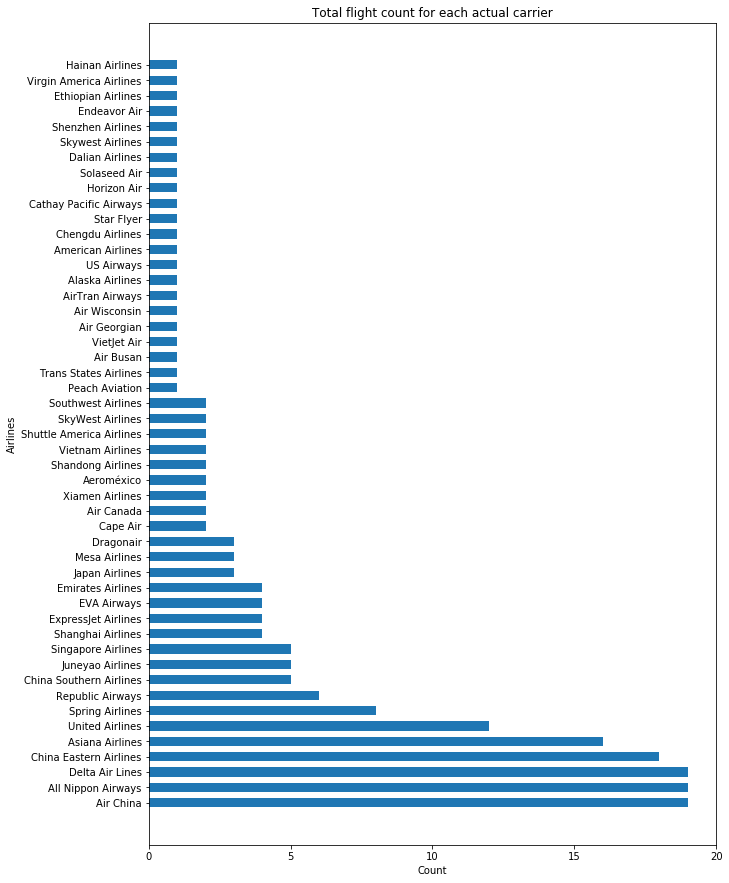

In [15]:
plt.figure(figsize=(10,12))
plt.barh(y = Airline_actual.index, width = Airline_actual, height = 0.6)
plt.tight_layout()
plt.xticks([0, 5, 10, 15, 20])
plt.ylabel('Airlines')
plt.xlabel('Count')
plt.title('Total flight count for each actual carrier')
plt.show()

# Mapping the airlines in a global map

Data cleaning and conversion for these visualization have been done in PyCharm and our group member’s personal Juypter notebook (codes have been uploaded with personal visualization). To make it clear and succinct for demonstration, we did not include those codesfor processing raw data in this peer visualization session. However, to make the data we used transparent, we provide all the data in the following codes.
We used the data from https://openflights.org/faq to convert the airport codes into latitude and longitude data for the mappint visualization.

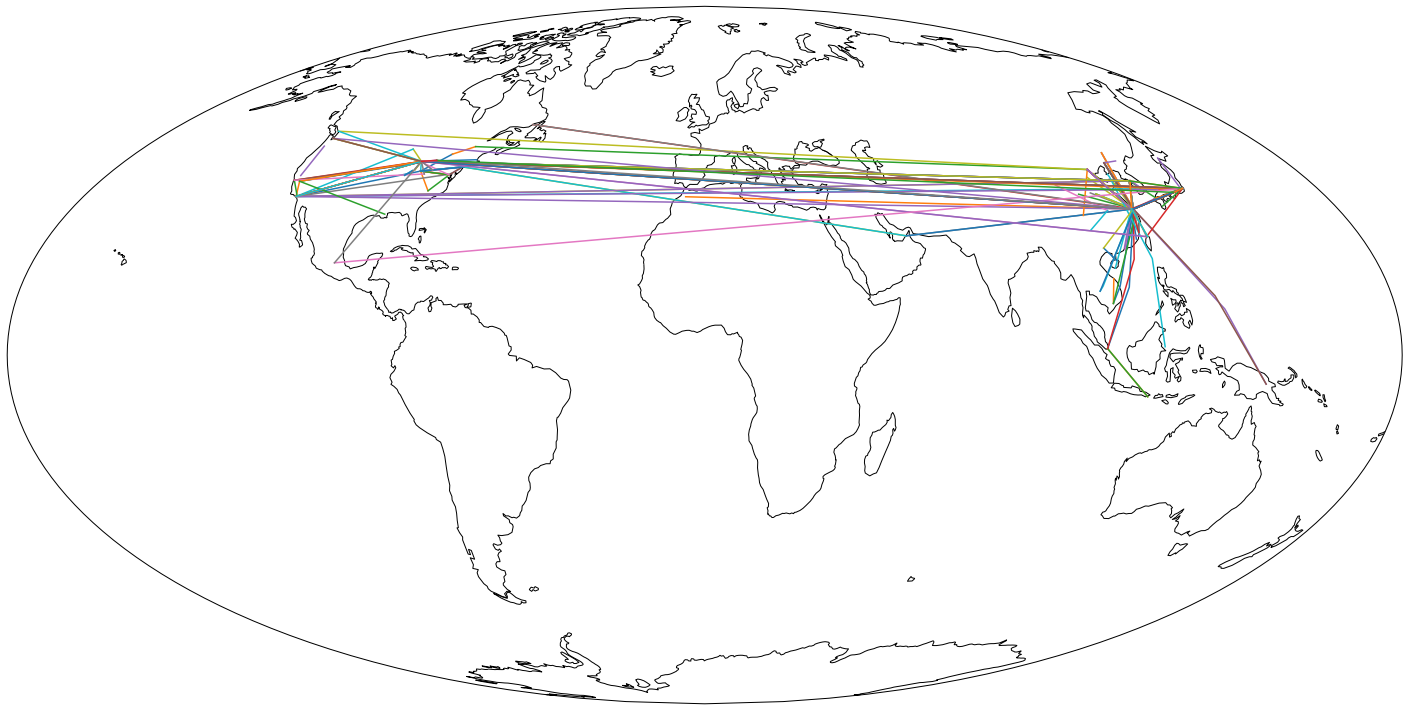

In [16]:
fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(111, projection = cartopy.crs.Mollweide())
XMN= 24.54400062561035, 118.12799835205078
PVG= 31.143400192260742, 121.80500030517578
CGQ= 43.9962005615, 125.684997559
FUK= 33.585899353027344, 130.4510040283203
YNT= 37.40169906616211, 121.37200164794922
HKG= 22.3089008331, 113.915000916
DXB= 25.2527999878,55.3643989563
JFK= 40.63980103,-73.77890015
MFM= 33.87910079956055,-5.515120029449463
XIY= 34.44710159301758,108.75199890136719
SHA= 31.197900772094727,121.33599853515625
PEK= 40.080101013183594,116.58499908447266
MDW= 41.7859992980957,-87.75240325927734
LAX= 33.94250107,-118.4079971
ATL= 37.38050079,-120.5680008
ORD= 41.97859955,-87.90480042
NRT= 35.7647018433,140.386001587
CGO= 34.519699096699995,113.841003418
SIN= 1.35019,103.994003
DPS= -8.7481698989868,115.16699981689
SHE= 41.639801025390625,123.48300170898438
FOC= 25.935100555419922,119.66300201416016
IND= 39.7173,-86.294403
CLT= 35.2140007019043,-80.94309997558594
EWR=40.692501068115234,-74.168701171875
DCA= 38.8521,-77.037697
SEA= 47.44900131225586,-122.30899810791016
ICN= 37.46910095214844,126.45099639892578
DAD= 16.043899536132812,108.1989974975586
SGN= 10.8187999725,106.652000427
IAD= 38.94449997,-77.45580292
SMF= 38.69540023803711,-121.59100341796875
HND= 35.552299,139.779999
HAK= 19.934900283813477,110.45899963378906
CKG= 29.719200134277344,106.64199829101562
GMP= 37.5583000183,126.791000366
NGB= 29.82670021057129,121.46199798583984
NKG= 1.742000579833984,118.86199951171875
KIX= 34.42729949951172,135.24400329589844
MSP= 44.881999969499994,-93.22180175780001
YYZ= 43.6772003174,-79.63059997559999
YUL= 45.4706001282,-73.7407989502
NGO= 34.8583984375,136.80499267578125
YVR= 49.193901062,-123.183998108
BUR= 34.20069885253906,-118.35900115966797
SFO= 37.61899948120117,-122.375
DTW= 42.212398529052734,-83.35340118408203
CVG= 39.0488014221,-84.6678009033
OKA= -6.081689834590001,145.391998291
WUH= 30.78380012512207,114.20800018310547
HFE= 31.780000686645508,117.2979965209961
NNG= 22.608299255371094,108.1719970703125
REP= 13.410699844400002,103.81300354
ITM= 34.785499572753906,135.43800354003906
YGJ= 35.4921989440918,133.23599243164062
CTS= 42.77519989013672,141.69200134277344
TPE= 25.0777,121.233002
KWE= 26.53849983215332,106.8010025024414
KOJ= 31.80340003967285,130.718994140625
CMI= 40.03919983,-88.27809906
CMH= 39.99800109863281,-82.89189910888672
DEC= 39.834598541259766,-88.8656997680664
STL= 38.74869918823242,-90.37000274658203
MEX= 19.4363,-99.072098
TSA= 25.069400787353516,121.552001953125
CTU= 50.8307991027832,-58.97560119628906
SZX= 22.639299392700195,113.81099700927734
SJW= 38.28070068359375,114.6969985961914
NBS= 42.066389, 127.606667
BWI= 39.17539978,-76.66829681
PDX= 45.58869934,-122.5979996
SYX= 18.302900314331055,109.41200256347656
PUS= 35.1795005798,128.93800354
LYA= 34.741100311299995,112.388000488
DLC= 38.9656982421875,121.53900146484375
BOS= 42.36429977,-71.00520325
LHW= 36.5152015686,103.620002747
TSN= 39.124401092499994,117.346000671
MSY= 29.99340057373047,-90.25800323486328
ax.plot([XMN[1],SHA[1]], [XMN[0], SHA[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],SHE[1]], [PVG[0], SHE[0]], transform = cartopy.crs.PlateCarree())
ax.plot([CGQ[1],PVG[1]], [CGQ[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],KIX[1]], [PVG[0], KIX[0]], transform = cartopy.crs.PlateCarree())
ax.plot([FUK[1],PVG[1]], [FUK[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],SHE[1]], [PVG[0], SHE[0]], transform = cartopy.crs.PlateCarree())
ax.plot([CGQ[1],PVG[1]], [CGQ[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],YNT[1]], [PVG[0], YNT[0]], transform = cartopy.crs.PlateCarree())
ax.plot([YNT[1],PVG[1]], [YNT[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],SHE[1]], [PVG[0], SHE[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],SHE[1]], [PVG[0], SHE[0]], transform = cartopy.crs.PlateCarree())
ax.plot([CGQ[1],PVG[1]], [CGQ[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],HKG[1]], [PVG[0], HKG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([HKG[1],PVG[1]], [HKG[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([HKG[1],PVG[1]], [HKG[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],HKG[1]], [PVG[0], HKG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([HKG[1],PVG[1]], [HKG[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],DXB[1]], [PVG[0], DXB[0]], transform = cartopy.crs.PlateCarree())
ax.plot([DXB[1],JFK[1]], [DXB[0], JFK[0]], transform = cartopy.crs.PlateCarree())
ax.plot([JFK[1],DXB[1]], [JFK[0], DXB[0]], transform = cartopy.crs.PlateCarree())
ax.plot([DXB[1],PVG[1]], [DXB[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([MFM[1],PVG[1]], [MFM[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([XIY[1],PVG[1]], [XIY[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([SHA[1],CTU[1]], [SHA[0], CTU[0]], transform = cartopy.crs.PlateCarree())
ax.plot([SHA[1],SZX[1]], [SHA[0], SZX[0]], transform = cartopy.crs.PlateCarree())
ax.plot([SHA[1],PEK[1]], [SHA[0], PEK[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PEK[1],SHA[1]], [PEK[0], SHA[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],SHE[1]], [PVG[0], SHE[0]], transform = cartopy.crs.PlateCarree())
ax.plot([SHA[1],SJW[1]], [SHA[0], SJW[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],ORD[1]], [PVG[0], ORD[0]], transform = cartopy.crs.PlateCarree())
ax.plot([MDW[1],ATL[1]], [MDW[0], ATL[0]], transform = cartopy.crs.PlateCarree())
ax.plot([LAX[1],ATL[1]], [LAX[0], ATL[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ATL[1],ORD[1]], [ATL[0], ORD[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ORD[1],PVG[1]], [ORD[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],LAX[1]], [PVG[0], LAX[0]], transform = cartopy.crs.PlateCarree())
ax.plot([LAX[1],ORD[1]], [LAX[0], ORD[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ORD[1],NRT[1]], [ORD[0], NRT[0]], transform = cartopy.crs.PlateCarree())
ax.plot([NRT[1],PVG[1]], [NRT[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([SHA[1],CGO[1]], [SHA[0], CGO[0]], transform = cartopy.crs.PlateCarree())
ax.plot([CGO[1],PVG[1]], [CGO[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],SIN[1]], [PVG[0], SIN[0]], transform = cartopy.crs.PlateCarree())
ax.plot([SIN[1],DPS[1]], [SIN[0], DPS[0]], transform = cartopy.crs.PlateCarree())
ax.plot([DPS[1],SIN[1]], [DPS[0], SIN[0]], transform = cartopy.crs.PlateCarree())
ax.plot([SIN[1],PVG[1]], [SIN[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([SHE[1],NBS[1]], [SHE[0], NBS[0]], transform = cartopy.crs.PlateCarree())
ax.plot([SHE[1],PVG[1]], [SHE[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([SHA[1],PEK[1]], [SHA[0], PEK[0]], transform = cartopy.crs.PlateCarree())
ax.plot([FOC[1],PVG[1]], [FOC[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],NRT[1]], [PVG[0], NRT[0]], transform = cartopy.crs.PlateCarree())
ax.plot([NRT[1],LAX[1]], [NRT[0], LAX[0]], transform = cartopy.crs.PlateCarree())
ax.plot([LAX[1],IND[1]], [LAX[0], IND[0]], transform = cartopy.crs.PlateCarree())
ax.plot([IND[1],CLT[1]], [IND[0], CLT[0]], transform = cartopy.crs.PlateCarree())
ax.plot([CLT[1],BWI[1]], [CLT[0], BWI[0]], transform = cartopy.crs.PlateCarree())
ax.plot([IND[1],EWR[1]], [IND[0], EWR[0]], transform = cartopy.crs.PlateCarree())
ax.plot([EWR[1],DCA[1]], [EWR[0], DCA[0]], transform = cartopy.crs.PlateCarree())
ax.plot([DCA[1],EWR[1]], [DCA[0], EWR[0]], transform = cartopy.crs.PlateCarree())
ax.plot([EWR[1],IND[1]], [EWR[0], IND[0]], transform = cartopy.crs.PlateCarree())
ax.plot([SEA[1],ORD[1]], [SEA[0], ORD[0]], transform = cartopy.crs.PlateCarree())
ax.plot([LAX[1],ICN[1]], [LAX[0], ICN[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ICN[1],PVG[1]], [ICN[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],SGN[1]], [PVG[0], SGN[0]], transform = cartopy.crs.PlateCarree())
ax.plot([DAD[1],SGN[1]], [DAD[0], SGN[0]], transform = cartopy.crs.PlateCarree())
ax.plot([SGN[1],PVG[1]], [SGN[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],ICN[1]], [PVG[0], ICN[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ICN[1],LAX[1]], [ICN[0], LAX[0]], transform = cartopy.crs.PlateCarree())
ax.plot([LAX[1],ORD[1]], [LAX[0], ORD[0]], transform = cartopy.crs.PlateCarree())
ax.plot([IND[1],IAD[1]], [IND[0], IAD[0]], transform = cartopy.crs.PlateCarree())
ax.plot([IAD[1],LAX[1]], [IAD[0], LAX[0]], transform = cartopy.crs.PlateCarree())
ax.plot([LAX[1],ORD[1]], [LAX[0], ORD[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ORD[1],IND[1]], [ORD[0], IND[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ORD[1],ICN[1]], [ORD[0], ICN[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ICN[1],NRT[1]], [ICN[0], NRT[0]], transform = cartopy.crs.PlateCarree())
ax.plot([FUK[1],ICN[1]], [FUK[0], ICN[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ICN[1],ORD[1]], [ICN[0], ORD[0]], transform = cartopy.crs.PlateCarree())
ax.plot([SMF[1],PDX[1]], [SMF[0], PDX[0]], transform = cartopy.crs.PlateCarree())
ax.plot([IND[1],IAD[1]], [IND[0], IAD[0]], transform = cartopy.crs.PlateCarree())
ax.plot([IAD[1],IND[1]], [IAD[0], IND[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ORD[1],NRT[1]], [ORD[0], NRT[0]], transform = cartopy.crs.PlateCarree())
ax.plot([HND[1],PVG[1]], [HND[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([SHA[1],SYX[1]], [SHA[0], SYX[0]], transform = cartopy.crs.PlateCarree())
ax.plot([HAK[1],NNG[1]], [HAK[0], NNG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([CKG[1],PEK[1]], [CKG[0], PEK[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PEK[1],SHA[1]], [PEK[0], SHA[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],ICN[1]], [PVG[0], ICN[0]], transform = cartopy.crs.PlateCarree())
ax.plot([GMP[1],PUS[1]], [GMP[0], PUS[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ICN[1],PVG[1]], [ICN[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([NGB[1],PVG[1]], [NGB[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([SHA[1],LYA[1]], [SHA[0], LYA[0]], transform = cartopy.crs.PlateCarree())
ax.plot([CGO[1],SHA[1]], [CGO[0], SHA[0]], transform = cartopy.crs.PlateCarree())
ax.plot([NKG[1],DLC[1]], [NKG[0], DLC[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],NRT[1]], [PVG[0], NRT[0]], transform = cartopy.crs.PlateCarree())
ax.plot([HND[1],KIX[1]], [HND[0], KIX[0]], transform = cartopy.crs.PlateCarree())
ax.plot([KIX[1],PVG[1]], [KIX[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([FOC[1],SHA[1]], [FOC[0], SHA[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],NRT[1]], [PVG[0], NRT[0]], transform = cartopy.crs.PlateCarree())
ax.plot([NRT[1],ORD[1]], [NRT[0], ORD[0]], transform = cartopy.crs.PlateCarree())
ax.plot([IND[1],EWR[1]], [IND[0], EWR[0]], transform = cartopy.crs.PlateCarree())
ax.plot([EWR[1],IND[1]], [EWR[0], IND[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ORD[1],MSP[1]], [ORD[0], MSP[0]], transform = cartopy.crs.PlateCarree())
ax.plot([MSP[1],LAX[1]], [MSP[0], LAX[0]], transform = cartopy.crs.PlateCarree())
ax.plot([IND[1],YYZ[1]], [IND[0], YYZ[0]], transform = cartopy.crs.PlateCarree())
ax.plot([YYZ[1],YUL[1]], [YYZ[0], YUL[0]], transform = cartopy.crs.PlateCarree())
ax.plot([YUL[1],PEK[1]], [YUL[0], PEK[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PEK[1],SHA[1]], [PEK[0], SHA[0]], transform = cartopy.crs.PlateCarree())
ax.plot([SHA[1],PEK[1]], [SHA[0], PEK[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],NGO[1]], [PVG[0], NGO[0]], transform = cartopy.crs.PlateCarree())
ax.plot([NGO[1],PVG[1]], [NGO[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([SHA[1],PEK[1]], [SHA[0], PEK[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PEK[1],YVR[1]], [PEK[0], YVR[0]], transform = cartopy.crs.PlateCarree())
ax.plot([YVR[1],ORD[1]], [YVR[0], ORD[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ORD[1],BOS[1]], [ORD[0], BOS[0]], transform = cartopy.crs.PlateCarree())
ax.plot([IND[1],DCA[1]], [IND[0], DCA[0]], transform = cartopy.crs.PlateCarree())
ax.plot([DCA[1],IND[1]], [DCA[0], IND[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ORD[1],LAX[1]], [ORD[0], LAX[0]], transform = cartopy.crs.PlateCarree())
ax.plot([LAX[1],HND[1]], [LAX[0], HND[0]], transform = cartopy.crs.PlateCarree())
ax.plot([NRT[1],ORD[1]], [NRT[0], ORD[0]], transform = cartopy.crs.PlateCarree())
ax.plot([MDW[1],DCA[1]], [MDW[0], DCA[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ORD[1],ICN[1]], [ORD[0], ICN[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ICN[1],PVG[1]], [ICN[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],ICN[1]], [PVG[0], ICN[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ICN[1],ORD[1]], [ICN[0], ORD[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ORD[1],LAX[1]], [ORD[0], LAX[0]], transform = cartopy.crs.PlateCarree())
ax.plot([BUR[1],SFO[1]], [BUR[0], SFO[0]], transform = cartopy.crs.PlateCarree())
ax.plot([SFO[1],ORD[1]], [SFO[0], ORD[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ORD[1],DTW[1]], [ORD[0], DTW[0]], transform = cartopy.crs.PlateCarree())
ax.plot([DTW[1],SFO[1]], [DTW[0], SFO[0]], transform = cartopy.crs.PlateCarree())
ax.plot([SFO[1],CVG[1]], [SFO[0], CVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([CVG[1],ORD[1]], [CVG[0], ORD[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ORD[1],PVG[1]], [ORD[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],NRT[1]], [PVG[0], NRT[0]], transform = cartopy.crs.PlateCarree())
ax.plot([NRT[1],PVG[1]], [NRT[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],HND[1]], [PVG[0], HND[0]], transform = cartopy.crs.PlateCarree())
ax.plot([HND[1],PVG[1]], [HND[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PEK[1],SHA[1]], [PEK[0], SHA[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],OKA[1]], [PVG[0], OKA[0]], transform = cartopy.crs.PlateCarree())
ax.plot([OKA[1],PVG[1]], [OKA[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([WUH[1],LHW[1]], [WUH[0], LHW[0]], transform = cartopy.crs.PlateCarree())
ax.plot([HFE[1],CTU[1]], [HFE[0], CTU[0]], transform = cartopy.crs.PlateCarree())
ax.plot([NNG[1],PVG[1]], [NNG[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],REP[1]], [PVG[0], REP[0]], transform = cartopy.crs.PlateCarree())
ax.plot([REP[1],PVG[1]], [REP[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],KIX[1]], [PVG[0], KIX[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ITM[1],HND[1]], [ITM[0], HND[0]], transform = cartopy.crs.PlateCarree())
ax.plot([YGJ[1],HND[1]], [YGJ[0], HND[0]], transform = cartopy.crs.PlateCarree())
ax.plot([NRT[1],PVG[1]], [NRT[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([SHA[1],PEK[1]], [SHA[0], PEK[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PEK[1],SHA[1]], [PEK[0], SHA[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],ICN[1]], [PVG[0], ICN[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ICN[1],ORD[1]], [ICN[0], ORD[0]], transform = cartopy.crs.PlateCarree())
ax.plot([IND[1],EWR[1]], [IND[0], EWR[0]], transform = cartopy.crs.PlateCarree())
ax.plot([JFK[1],IND[1]], [JFK[0], IND[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ORD[1],HND[1]], [ORD[0], HND[0]], transform = cartopy.crs.PlateCarree())
ax.plot([HND[1],PVG[1]], [HND[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([SHA[1],HND[1]], [SHA[0], HND[0]], transform = cartopy.crs.PlateCarree())
ax.plot([CTS[1],HND[1]], [CTS[0], HND[0]], transform = cartopy.crs.PlateCarree())
ax.plot([NRT[1],ORD[1]], [NRT[0], ORD[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ORD[1],TPE[1]], [ORD[0], TPE[0]], transform = cartopy.crs.PlateCarree())
ax.plot([TPE[1],PVG[1]], [TPE[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([SHA[1],TSN[1]], [SHA[0], TSN[0]], transform = cartopy.crs.PlateCarree())
ax.plot([KWE[1],WUH[1]], [KWE[0], WUH[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],HND[1]], [PVG[0], HND[0]], transform = cartopy.crs.PlateCarree())
ax.plot([HND[1],FUK[1]], [HND[0], FUK[0]], transform = cartopy.crs.PlateCarree())
ax.plot([KOJ[1],HND[1]], [KOJ[0], HND[0]], transform = cartopy.crs.PlateCarree())
ax.plot([NRT[1],TPE[1]], [NRT[0], TPE[0]], transform = cartopy.crs.PlateCarree())
ax.plot([TPE[1],ORD[1]], [TPE[0], ORD[0]], transform = cartopy.crs.PlateCarree())
ax.plot([CMI[1],ORD[1]], [CMI[0], ORD[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ORD[1],CMH[1]], [ORD[0], CMH[0]], transform = cartopy.crs.PlateCarree())
ax.plot([CMH[1],ORD[1]], [CMH[0], ORD[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ORD[1],CMI[1]], [ORD[0], CMI[0]], transform = cartopy.crs.PlateCarree())
ax.plot([DEC[1],STL[1]], [DEC[0], STL[0]], transform = cartopy.crs.PlateCarree())
ax.plot([STL[1],DEC[1]], [STL[0], DEC[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ORD[1],ATL[1]], [ORD[0], ATL[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ATL[1],MSY[1]], [ATL[0], MSY[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ORD[1],PVG[1]], [ORD[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([SHA[1],PEK[1]], [SHA[0], PEK[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],HND[1]], [PVG[0], HND[0]], transform = cartopy.crs.PlateCarree())
ax.plot([NRT[1],MEX[1]], [NRT[0], MEX[0]], transform = cartopy.crs.PlateCarree())
ax.plot([MEX[1],ORD[1]], [MEX[0], ORD[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ORD[1],SEA[1]], [ORD[0], SEA[0]], transform = cartopy.crs.PlateCarree())
ax.plot([LAX[1],ORD[1]], [LAX[0], ORD[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ORD[1],PVG[1]], [ORD[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([SHA[1],GMP[1]], [SHA[0], GMP[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ICN[1],NRT[1]], [ICN[0], NRT[0]], transform = cartopy.crs.PlateCarree())
ax.plot([HND[1],PVG[1]], [HND[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],SEA[1]], [PVG[0], SEA[0]], transform = cartopy.crs.PlateCarree())
ax.plot([SEA[1],ORD[1]], [SEA[0], ORD[0]], transform = cartopy.crs.PlateCarree())
ax.plot([ORD[1],DTW[1]], [ORD[0], DTW[0]], transform = cartopy.crs.PlateCarree())
ax.plot([DTW[1],PVG[1]], [DTW[0], PVG[0]], transform = cartopy.crs.PlateCarree())
ax.plot([SHA[1],TSA[1]], [SHA[0], TSA[0]], transform = cartopy.crs.PlateCarree())
ax.plot([TSA[1],SHA[1]], [TSA[0], SHA[0]], transform = cartopy.crs.PlateCarree())
ax.plot([PVG[1],NRT[1]], [PVG[0], NRT[0]], transform = cartopy.crs.PlateCarree())
ax.plot([NRT[1],NGO[1]], [NRT[0], NGO[0]], transform = cartopy.crs.PlateCarree())
ax.plot([NGO[1],DTW[1]], [NGO[0], DTW[0]], transform = cartopy.crs.PlateCarree())
ax.plot([DTW[1],ORD[1]], [DTW[0], ORD[0]], transform = cartopy.crs.PlateCarree())
ax.set_global()
ax.coastlines()

# Visualizing the networks between airports

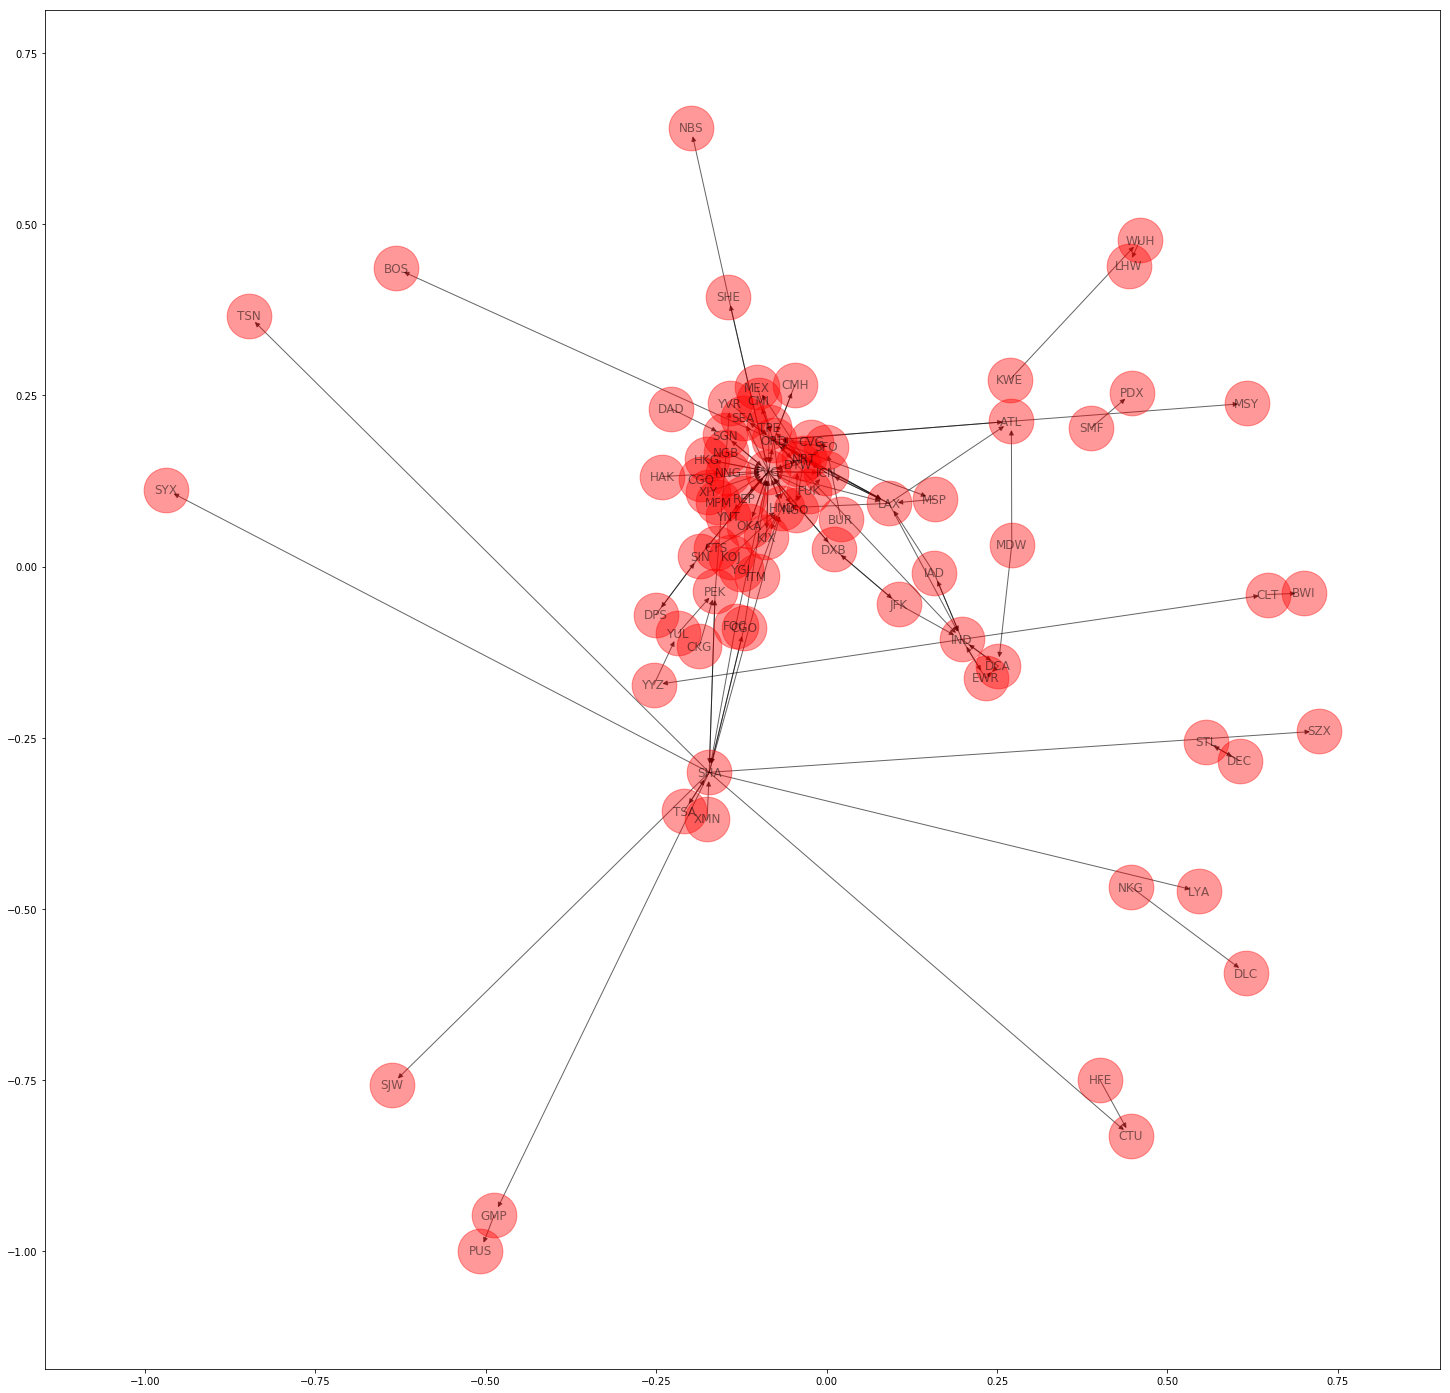

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
#create graph
DG = nx.DiGraph() 
#add nodes
DG.add_nodes_from(['XMN',
 'PVG',
 'CGQ',
 'FUK',
 'YNT',
 'HKG',
 'DXB',
 'JFK',
 'MFM',
 'XIY',
 'SHA',
 'PEK',
 'MDW',
 'LAX',
 'ATL',
 'ORD',
 'NRT',
 'CGO',
 'SIN',
 'DPS',
 'SHE',
 'FOC',
 'IND',
 'CLT',
 'EWR',
 'DCA',
 'SEA',
 'ICN',
 'DAD',
 'SGN',
 'IAD',
 'SMF',
 'HND',
 'HAK',
 'CKG',
 'GMP',
 'NGB',
 'NKG',
 'KIX',
 'MSP',
 'YYZ',
 'YUL',
 'NGO',
 'YVR',
 'BUR',
 'SFO',
 'DTW',
 'CVG',
 'OKA',
 'WUH',
 'HFE',
 'NNG',
 'REP',
 'ITM',
 'YGJ',
 'CTS',
 'TPE',
 'KWE',
 'KOJ',
 'CMI',
 'CMH',
 'DEC',
 'STL',
 'MEX',
 'TSA',
 'CTU',
 'SZX',
 'SJW',
 'NBS',
 'BWI',
 'PDX',
 'SYX',
 'PUS',
 'LYA',
 'DLC',
 'BOS',
 'LHW',
 'TSN',
 'MSY'])
#print(DG.nodes())
#add nodes
DG.add_edges_from([('XMN','SHA'),
('PVG','SHE'),
('CGQ','PVG'),
('PVG','KIX'),
('FUK','PVG'),
('PVG','SHE'),
('CGQ','PVG'),
('PVG','YNT'),
('YNT','PVG'),
('PVG','SHE'),
('PVG','SHE'),
('CGQ','PVG'),
('PVG','HKG'),
('HKG','PVG'),
('HKG','PVG'),
('PVG','HKG'),
('HKG','PVG'),
('PVG','DXB'),
('DXB','JFK'),
('JFK','DXB'),
('DXB','PVG'),
('MFM','PVG'),
('XIY','PVG'),
('SHA','CTU'),
('SHA','SZX'),
('SHA','PEK'),
('PEK','SHA'),
('PVG','SHE'),
('SHA','SJW'),
('PVG','ORD'),
('MDW','ATL'),
('LAX','ATL'),
('ATL','ORD'),
('ORD','PVG'),
('PVG','LAX'),
('LAX','ORD'),
('ORD','NRT'),
('NRT','PVG'),
('SHA','CGO'),
('CGO','PVG'),
('PVG','SIN'),
('SIN','DPS'),
('DPS','SIN'),
('SIN','PVG'),
('SHE','NBS'),
('SHE','PVG'),
('SHA','PEK'),
('FOC','PVG'),
('PVG','NRT'),
('NRT','LAX'),
('LAX','IND'),
('IND','CLT'),
('CLT','BWI'),
('IND','EWR'),
('EWR','DCA'),
('DCA','EWR'),
('EWR','IND'),
('SEA','ORD'),
('LAX','ICN'),
('ICN','PVG'),
('PVG','SGN'),
('DAD','SGN'),
('SGN','PVG'),
('PVG','ICN'),
('ICN','LAX'),
('LAX','ORD'),
('IND','IAD'),
('IAD','LAX'),
('LAX','ORD'),
('ORD','IND'),
('ORD','ICN'),
('ICN','NRT'),
('FUK','ICN'),
('ICN','ORD'),
('SMF','PDX'),
('IND','IAD'),
('IAD','IND'),
('ORD','NRT'),
('HND','PVG'),
('SHA','SYX'),
('HAK','NNG'),
('CKG','PEK'),
('PEK','SHA'),
('PVG','ICN'),
('GMP','PUS'),
('ICN','PVG'),
('NGB','PVG'),
('SHA','LYA'),
('CGO','SHA'),
('NKG','DLC'),
('PVG','NRT'),
('HND','KIX'),
('KIX','PVG'),
('FOC','SHA'),
('PVG','NRT'),
('NRT','ORD'),
('IND','EWR'),
('EWR','IND'),
('ORD','MSP'),
('MSP','LAX'),
('IND','YYZ'),
('YYZ','YUL'),
('YUL','PEK'),
('PEK','SHA'),
('SHA','PEK'),
('PVG','NGO'),
('NGO','PVG'),
('SHA','PEK'),
('PEK','YVR'),
('YVR','ORD'),
('ORD','BOS'),
('IND','DCA'),
('DCA','IND'),
('ORD','LAX'),
('LAX','HND'),
('NRT','ORD'),
('MDW','DCA'),
('ORD','ICN'),
('ICN','PVG'),
('PVG','ICN'),
('ICN','ORD'),
('ORD','LAX'),
('BUR','SFO'),
('SFO','ORD'),
('ORD','DTW'),
('DTW','SFO'),
('SFO','CVG'),
('CVG','ORD'),
('ORD','PVG'),
('PVG','NRT'),
('NRT','PVG'),
('PVG','HND'),
('HND','PVG'),
('PEK','SHA'),
('PVG','OKA'),
('OKA','PVG'),
('WUH','LHW'),
('HFE','CTU'),
('NNG','PVG'),
('PVG','REP'),
('REP','PVG'),
('PVG','KIX'),
('ITM','HND'),
('YGJ','HND'),
('NRT','PVG'),
('SHA','PEK'),
('PEK','SHA'),
('PVG','ICN'),
('ICN','ORD'),
('IND','EWR'),
('JFK','IND'),
('ORD','HND'),
('HND','PVG'),
('SHA','HND'),
('CTS','HND'),
('NRT','ORD'),
('ORD','TPE'),
('TPE','PVG'),
('SHA','TSN'),
('KWE','WUH'),
('PVG','HND'),
('HND','FUK'),
('KOJ','HND'),
('NRT','TPE'),
('TPE','ORD'),
('CMI','ORD'),
('ORD','CMH'),
('CMH','ORD'),
('ORD','CMI'),
('DEC','STL'),
('STL','DEC'),
('ORD','ATL'),
('ATL','MSY'),
('ORD','PVG'),
('SHA','PEK'),
('PVG','HND'),
('NRT','MEX'),
('MEX','ORD'),
('ORD','SEA'),
('LAX','ORD'),
('ORD','PVG'),
('SHA','GMP'),
('ICN','NRT'),
('HND','PVG'),
('PVG','SEA'),
('SEA','ORD'),
('ORD','DTW'),
('DTW','PVG'),
('SHA','TSA'),
('TSA','SHA'),
('PVG','NRT'),
('NRT','NGO'),
('NGO','DTW'),
('DTW','ORD')])
#print(DG.edges())
#set display features
colors = ["purple","pink","blue","orange"]
pos=nx.spring_layout(DG)
nx.draw_networkx_nodes(DG, pos, alpha=0.4,node_size=2000) #,node_color=colors)
nx.draw_networkx_edges(DG, pos, node_color='r', alpha=0.6)
nx.draw_networkx_labels(DG, pos, font_family='sans-serif', alpha=0.5)
plt.show()

Note: For some reasons, the colors we used in other environment is not working with the is590dv conda. Therefore, It is not as good as what we would like to do.

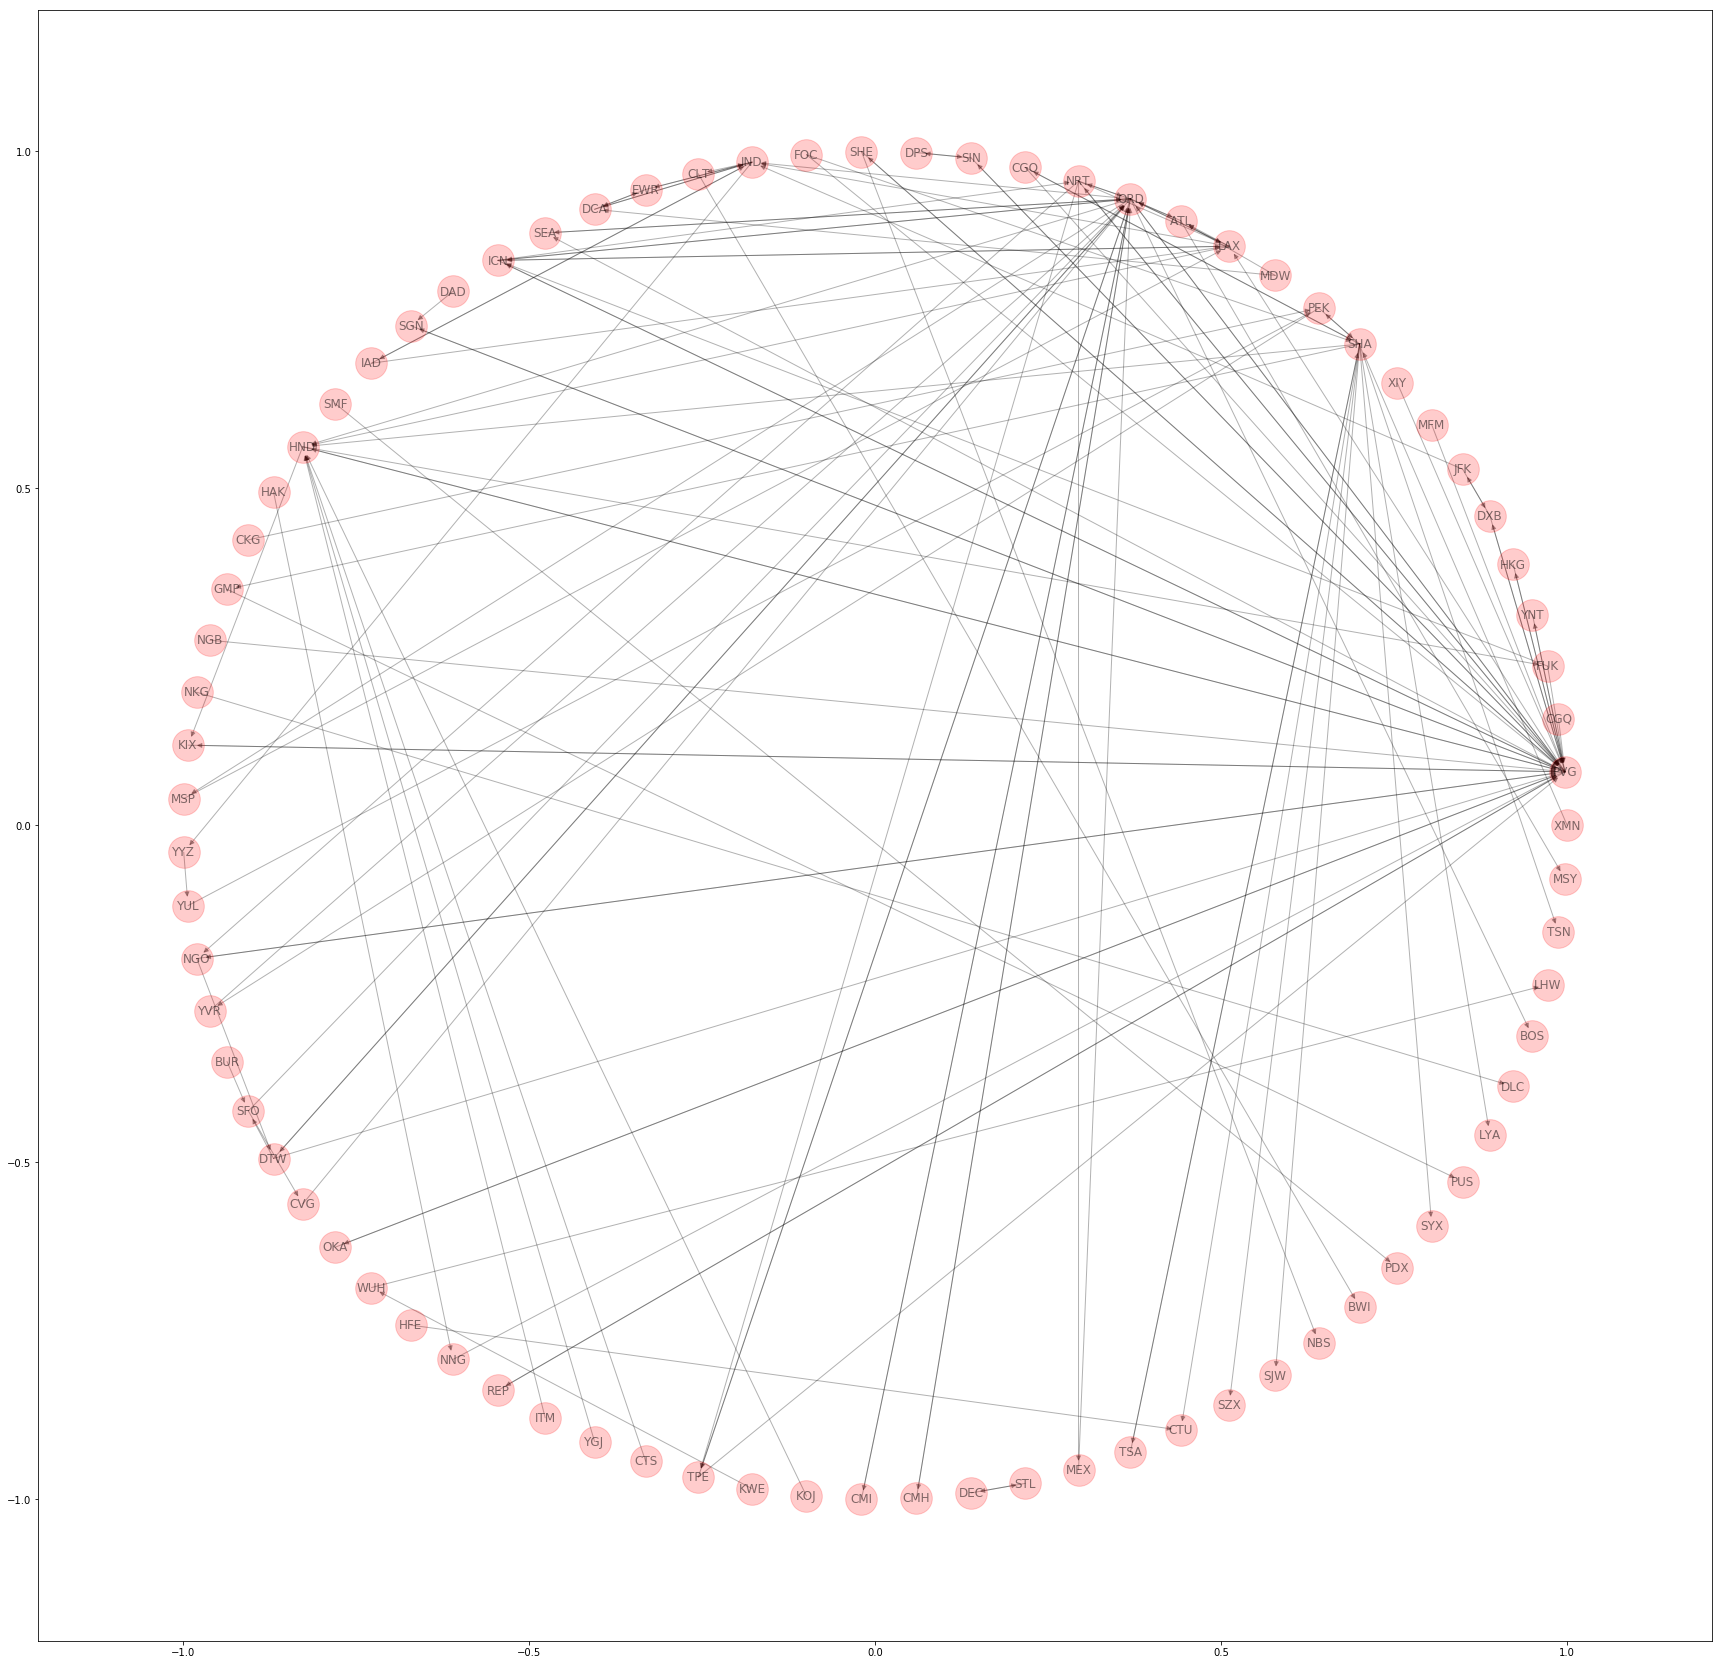

In [18]:
plt.figure(figsize=(30,30))
pos=nx.circular_layout(DG)
nx.draw_networkx_nodes(DG, pos, alpha=0.2,node_size=1000) #,node_color=colors)
nx.draw_networkx_edges(DG, pos, node_color='r', alpha=0.3)
nx.draw_networkx_labels(DG, pos, font_family='sans-serif', alpha=0.5)
plt.show()

In [19]:
Flights.loc[:,('Duration', 'Mileage')].head()

,Duration,Mileage
0,01:25:00,878
1,02:15:00,1364
2,02:35:00,1698
3,02:05:00,1337
4,01:55:00,877


In [20]:
# Convert duration object to int in hours
time = pd.DatetimeIndex(Flights['Duration'].astype(str))
Flights['Duration'] = time.hour + time.minute/60

In [21]:
Flights.loc[:,('Duration', 'Mileage')].head()

,Duration,Mileage
0,1.416667,878
1,2.250000,1364
2,2.583333,1698
3,2.083333,1337
4,1.916667,877


## Relations between total flight hours and airlines

In [22]:
# Sort airlines by the total duration hours of their flights
durations = Flights.groupby("Airline_sold")["Duration"].sum().sort_values(ascending = False)

In [23]:
durations

Airline_sold
Asiana Airlines            106.666667
All Nippon Airways         105.833333
Delta Air Lines             99.233333
United Airlines             83.966667
China Eastern Airlines      78.833333
Air China                   66.666667
Emirates Airlines           43.583333
EVA Airways                 34.666667
Singapore Airlines          26.083333
Japan Airlines              19.083333
Spring Airlines             18.583333
Aeroméxico                  17.166667
American Airlines           15.550000
Juneyao Airlines            14.333333
China Southern Airlines      8.500000
Vietnam Airlines             8.333333
Shanghai Airlines            8.000000
Dragonair                    7.750000
Air Canada                   6.683333
Alaska Airlines              5.633333
Virgin America Airlines      3.916667
Xiamen Airlines              3.583333
Southwest Airlines           3.500000
US Airways                   3.166667
Shandong Airlines            3.000000
Peach Aviation               2.666667

In [24]:
df["Airline"].nunique()

52

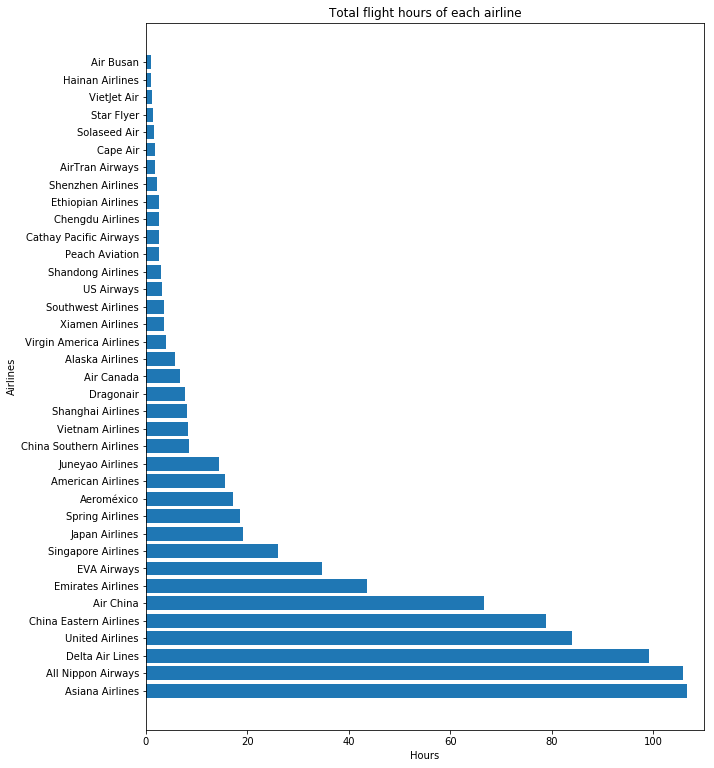

In [25]:
# Total flight hours of each airline
plt.figure(figsize = (10,13))
plt.barh(durations.index, durations)
plt.xlim(0, 110)
# plt.ylim(0, 51)
plt.ylabel('Airlines')
plt.xlabel('Hours')
plt.title('Total flight hours of each airline')
plt.show()

In [26]:
# Get ten airlines with longest flight hours
longest = durations[:10].index.tolist()
longest

['Asiana Airlines',
 'All Nippon Airways',
 'Delta Air Lines',
 'United Airlines',
 'China Eastern Airlines',
 'Air China',
 'Emirates Airlines',
 'EVA Airways',
 'Singapore Airlines',
 'Japan Airlines']

## Relations between total mileages and airlines

In [28]:
# Sort airlines by the total mileages of their flights
mileages = Flights.groupby("Airline_sold")["Mileage"].sum().sort_values(ascending = False)

In [29]:
mileages

Airline_sold
Asiana Airlines            79522
All Nippon Airways         76315
Delta Air Lines            63911
United Airlines            54169
China Eastern Airlines     54138
Air China                  41318
Emirates Airlines          34934
EVA Airways                26773
Singapore Airlines         19701
Aeroméxico                 13985
Japan Airlines             13687
American Airlines          12158
Spring Airlines            11253
Juneyao Airlines            6777
Vietnam Airlines            5472
China Southern Airlines     5153
Shanghai Airlines           4229
Air Canada                  4071
Dragonair                   3732
Alaska Airlines             3543
Virgin America Airlines     2808
Xiamen Airlines             1953
Peach Aviation              1788
Southwest Airlines          1770
Shandong Airlines           1728
Chengdu Airlines            1392
Shenzhen Airlines           1364
US Airways                  1267
Ethiopian Airlines          1260
Cathay Pacific Airways      12

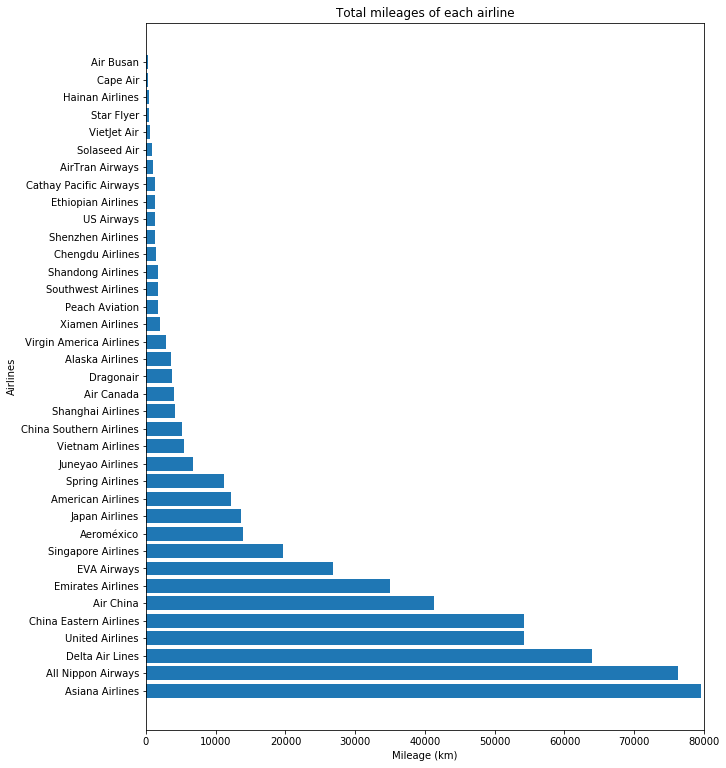

In [30]:
# Total mileages of each airline
plt.figure(figsize = (10,13))
plt.barh(mileages.index, mileages)
plt.xlim(0, 80000)
plt.xlabel('Mileage (km)')
plt.ylabel('Airlines')
plt.title('Total mileages of each airline')
plt.show()

In [31]:
# Get ten airlines with farthest mileages
farthest = mileages[:10].index.tolist()
farthest

['Asiana Airlines',
 'All Nippon Airways',
 'Delta Air Lines',
 'United Airlines',
 'China Eastern Airlines',
 'Air China',
 'Emirates Airlines',
 'EVA Airways',
 'Singapore Airlines',
 'Aeroméxico']

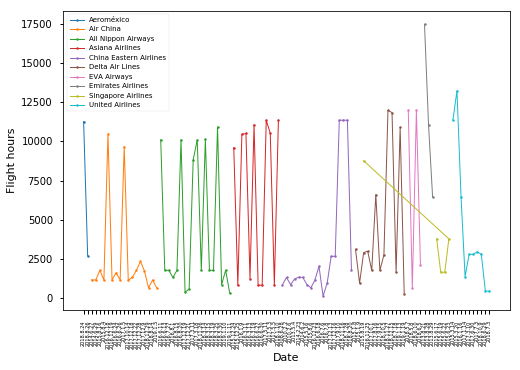

In [32]:
# Total flight hours of ten farthest airlines as a function of date
far_airlines = pd.DataFrame()
for i in farthest:
    airline = df.loc[df['Airline'] == i]
    far_airlines = far_airlines.append(airline)
    
airlines = {}
with plt.style.context('seaborn-notebook'):
    for airline, dataset in far_airlines.groupby("Airline"):
        airlines[airline] = dataset.groupby("Date")["Mileage"].sum()
        plt.plot(airlines[airline], marker = '.', markersize = 5.0, linewidth = 1, label=airline)
        plt.xticks(fontsize=5,rotation = 90)
        plt.xlabel('Date')
        plt.ylabel('Flight hours')
    plt.legend(loc = 'upper left', prop={'size': 7})

## Relations between average speed and most common airlines

Get the airlines with longest duration hours and longest mileages as most common airlines

In [33]:
most_common = list(set(longest + farthest))
len(most_common)

11

In [34]:
common_airlines = pd.DataFrame()
for i in most_common:
    airline = df.loc[df['Airline'] == i]
    common_airlines = common_airlines.append(airline)

In this part of project, I made visualizations on Airlines and Departure Airports specifically- 
in order to better analyze how many airlines Haocong has been flying with, and how the 
Departure Airport and the Departure City are related to each other.

I made histograms, bar charts and scatter plots for the analysis here.


First we group the airlines with by flight numbers (so that we can find how many times-
Haocong has been flying with each airline) and sort out the ascending order of counts.

In [36]:
airlines = dt.groupby("Airline")["Flight No"].count().sort_values()

In [37]:
airlines

Airline
Horizon Air\ndba Alaska Horizon                  1
Republic Airways\ndba US Airways Express         1
Virgin America Airlines                          1
Hainan Airlines                                  1
Ethiopian Airlines                               1
Endeavor Air\ndba Delta Connection               1
Shenzhen Airlines                                1
Skywest Airlines\ndba United Express             1
Dalian Airlines\ndba Air China                   1
Peach Aviation                                   1
Chengdu Airlines                                 1
Cathay Pacific Airways                           1
Solaseed Air                                     1
Trans States Airlines\ndba United Express        1
Air Busan                                        1
VietJet Air                                      1
Air Georgian\ndba Air Canada Express             1
Star Flyer                                       1
AirTran Airways                                  1
Air Wisconsin\ndba Unit

In [38]:
#the total number of the unique airlines

dt["Airline"].nunique()

52

Text(0, 0.5, 'order of manitudes')

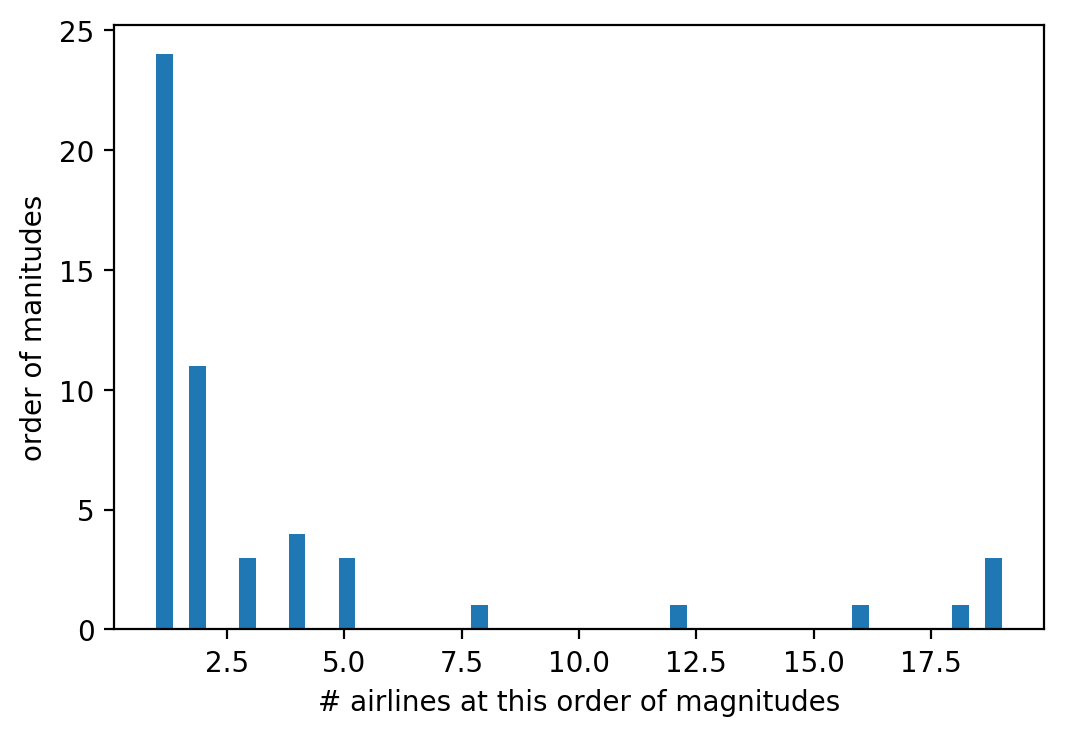

In [39]:
#Here we make a histogram to see the gaps in the flying times between different airlines-
#(but it doesn't make too much sense for the analysis)
#For example, we can find that there are more than 20 airlines that he flew with for only once.

plt.figure(dpi=200)
plt.hist(airlines, bins = 51)
plt.xlabel("# airlines at this order of magnitudes")
plt.ylabel("order of manitudes")

Then we make a bar chart to visualize the actual times Haocong has been flying with each unique airline so that we can find his preferences and the clear comparisons between airlines.
For example, we can see that he's flown the most with Air China and All Nipon Airways (for about 19 times),Delta, Asiana the second... and so on. 

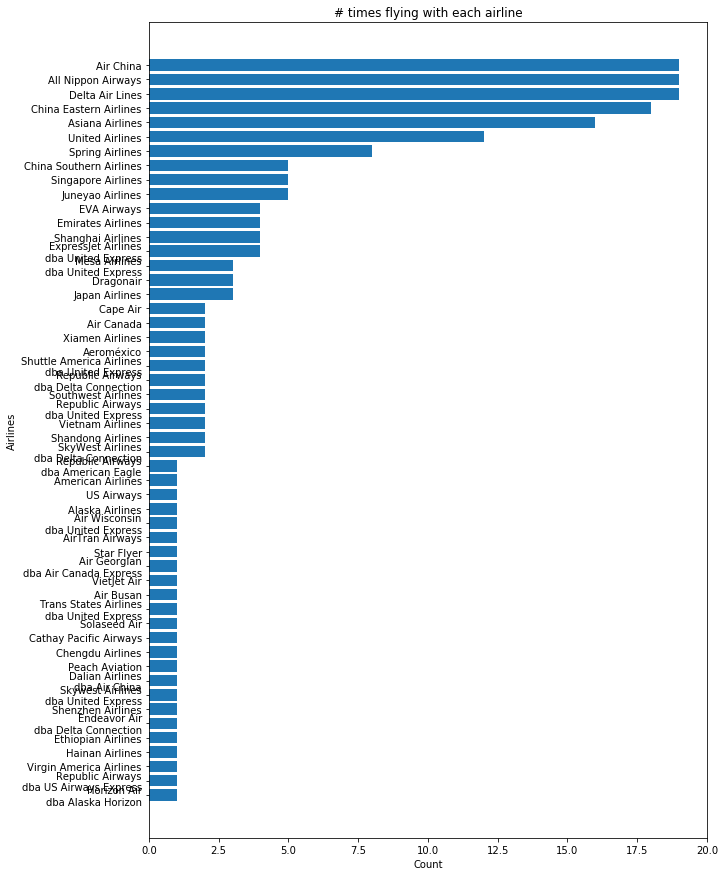

In [40]:
plt.figure(figsize = (10,15))
plt.barh(airlines.index, airlines)
plt.xlim(0, 20)
# plt.ylim(0, 51)
plt.ylabel('Airlines')
plt.xlabel('Count')
plt.title('# times flying with each airline')
plt.show()

In [41]:
dt["Departure Airport"].unique()

array(["Xiamen Gaoqi Int'l", "Shanghai Pudong Int'l",
       "Changchun Longjia Int'l", "Fukuoka Int'l", 'Yantai Laishan',
       "Hong Kong Int'l", "Dubai Int'l", "New York John F Kennedy Int'l",
       "Macau Int'l", "Xi'an Xianyang Int'l", "Shanghai Hongqiao Int'l",
       "Beijing Capital Int'l", "Chicago Midway Int'l",
       "Los Angeles Int'l", "Atlanta Hartsfield-Jackson Int'l",
       "Chicago O'Hare Int'l", "Tokyo Narita Int'l",
       "Zhengzhou Xinzheng Int'l", "Singapore Changi Int'l",
       "Denpasar Ngurah Rai Int'l", "Shenyang Taoxian Int'l",
       "Fuzhou Changle Int'l", "Indianapolis Int'l",
       "Charlotte Douglas Int'l", "Newark Liberty Int'l",
       'Washington Reagon National', "Seattle Tacoma Int'l",
       "Seoul Incheon Int'l", "Da Nang Int'l",
       "Ho Chi Minh Tan Son Nhat Int'l", "Washington Dulles Int'l",
       "Sacramento Int'l", "Tokyo Haneda Int'l", "Haikou Meilan Int'l",
       "Chongqing Jiangbei Int'l", "Seoul Gimpo Int'l",
       "Ningbo Lish

Here we group the departure airport by the departure city so that we can find how many times he's been flying from a unique airport.

In [42]:
dept_airport = dt.groupby('Departure Airport')['Departure City'].count().sort_values()
arr_airport = dt.groupby('Arrival Airport')['Departure City'].count().sort_values()

In [43]:
dept_airport = dt.groupby('Departure City')['Departure Airport'].count().sort_values()
arr_airport = dt.groupby('Arrival City')['Departure Airport'].count().sort_values()

In [44]:
arr_airport

Arrival City
Zhengzhou               1
Okinawa                 1
New Orleans             1
Nannin                  1
Yantai                  1
Montreal                1
Minneapolis/St.Paul     1
Mexico City             1
Luoyang                 1
Shenzhen                1
Lanzhou                 1
Shijiazhuang            1
Siem Reap               1
Sanya                   1
St.Louis                1
Fukuoka                 1
Denpasar                1
Baltimore               1
Wuhan                   1
Vancouver               1
Busan                   1
Changbaishan            1
Tianjin                 1
Charlotte               1
Toronto                 1
Cincinnati              1
Columbus                1
Dalian                  1
Decatur                 1
Urbana/Champaign        1
Portland                1
Seattle                 2
Singapore               2
Nagoya                  2
Dubai                   2
Boston                  2
Chengdu                 2
San Francisco           2

In [45]:
all_airport = pd.concat([dept_airport, arr_airport], names = ['Airport'])
all_airport.sort_values()

Montreal                1
Portland                1
Urbana/Champaign        1
Decatur                 1
Dalian                  1
Zhengzhou               1
Okinawa                 1
New Orleans             1
Nannin                  1
Yantai                  1
Montreal                1
Minneapolis/St.Paul     1
Mexico City             1
Luoyang                 1
Shenzhen                1
Lanzhou                 1
Shijiazhuang            1
Siem Reap               1
Sanya                   1
St.Louis                1
Fukuoka                 1
Denpasar                1
Baltimore               1
Wuhan                   1
Vancouver               1
Busan                   1
Changbaishan            1
Tianjin                 1
Charlotte               1
Toronto                 1
                       ..
Seattle                 2
Zhengzhou               2
San Francisco           2
Detroit                 3
Osaka                   3
Atlanta                 3
Changchun               3
Detroit     

In [46]:
all_airport = all_airport.groupby(all_airport.index).sum().sort_values(ascending = False)

In [47]:
all_airport

Shanghai               94
Chicago                45
Tokyo                  35
Seoul                  19
Indianapolis           17
Los Angeles            15
Beijing                14
New York               12
Washington D.C.         9
Shenyang                7
Taipei                  6
Detroit                 6
Hong Kong               5
Atlanta                 5
Osaka                   5
Singapore               4
San Francisco           4
Nagoya                  4
Dubai                   4
Seattle                 4
Ho Chi Minh City        3
Fukuoka                 3
Changchun               3
Boston                  3
Zhengzhou               3
Montreal                2
Minneapolis/St.Paul     2
Fuzhou                  2
Vancouver               2
Denpasar                2
                       ..
Toronto                 2
Chongqing               1
Xi'an                   1
Changbaishan            1
Da Nang                 1
Busan                   1
Burbank                 1
Dalian      

Then we make a scatter plot to visualize the number of times that he's flown from each unique airport.
For example, we can see a large amount of airports were used for only once, some were used a little more,
Tokyo Narita was comparatively high, Shanghai Hongqiao higher, Chicago O'Hare even higher, and Shanghai Pudong the most.
We can clearly see his travel preferences through this scatter plot, and based on the information,
I assume that he has home in Shanghai, studies near Chicago, and loves traveling to Japan and Korea. 


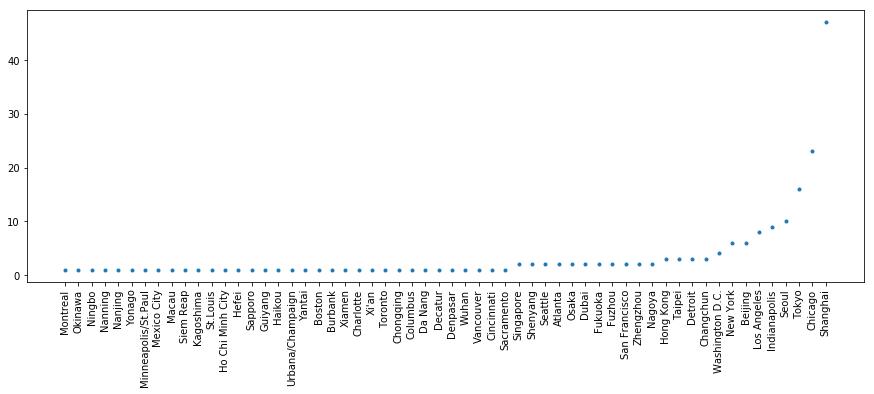

In [48]:
plt.figure(figsize = (15, 5))
plt.plot(dept_airport, '.')
plt.xticks(rotation = 90)
plt.show()

Here we make another bar chart for the same subject as above, to better visualize the information and my assumption.

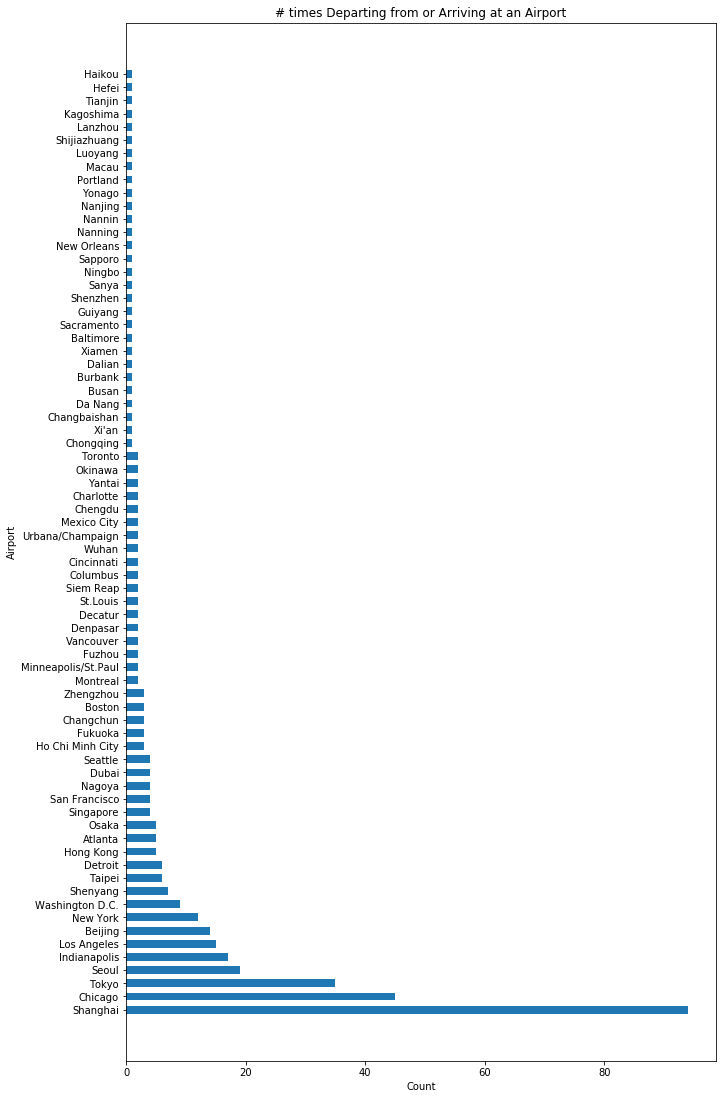

In [49]:
plt.figure(figsize=(10,15))
plt.barh(y = all_airport.index, width = all_airport, height = 0.6)
plt.tight_layout()
# plt.xlim(0, 20)
# plt.ylim(0, 51)
plt.ylabel('Airport')
plt.xlabel('Count')
plt.title('# times Departing from or Arriving at an Airport')
plt.show()